###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [ ]:
#import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

from google.colab import drive
drive.mount('/content/drive')
train_val = pd.read_csv("/content/drive/MyDrive/train-val.csv")
train_val = train_val.drop(columns = ['id'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [ ]:
# 2α το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων
rows, columns = train_val.shape
print(f'Number of samples: {rows}')
print(f'Number of features: {columns}')


Number of samples: 48423
Number of features: 23


In [ ]:
# 2β, 2γ το είδος των χαρακτηριστικών του συνόλου δεδομένων, τις ετικέτες των χαρακτηριστικών
print("Features and Data Types:")
for column, dtype in zip(train_val.columns, train_val.dtypes):
    print(f"{column}: {dtype}")


Features and Data Types:
Date: object
Location: object
MinTemp: float64
MaxTemp: float64
Rainfall: float64
Evaporation: float64
Sunshine: float64
WindGustDir: object
WindGustSpeed: float64
WindDir9am: object
WindDir3pm: object
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Humidity3pm: float64
Pressure9am: float64
Pressure3pm: float64
Cloud9am: float64
Cloud3pm: float64
Temp9am: float64
Temp3pm: float64
RainToday: float64
RainTomorrow: float64


In [ ]:
# 2δ, 2ε το πλήθος των κατηγοριών,πόσα δείγματα ανήκουν σε κάθε κατηγορία
for column in train_val.columns:
    if train_val[column].dtype == 'object':
        categories = train_val[column].unique()
        print(f"\n{column} ({len(categories)} categories):")
        print(categories)



Date (2534 categories):
['2009-03-04' '2009-03-05' '2009-03-09' ... '2008-10-05' '2008-11-10'
 '2008-07-11']

Location (49 categories):
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

WindGustDir (17 categories):
['WNW' 'SW' 'NNE' 'NE' 'W' 'ENE' 'NW' 'SSE' 'NNW' 'S' 'SE' 'WSW' 'ESE' 'E'
 'N' 'SSW' nan]

WindDir9am (17 categories):
['W' 'WSW' 'SSE' 'ESE' 'NE' 'ENE' nan 'E' 'S' 'SE' 'WNW' 'NW' 'NNW' 'NNE'
 'N' 'SW' 'SSW']

WindDir3pm (17 categories):
['WNW' 'W' '

<ipython-input-95-f26df3b31867>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_val.corr()


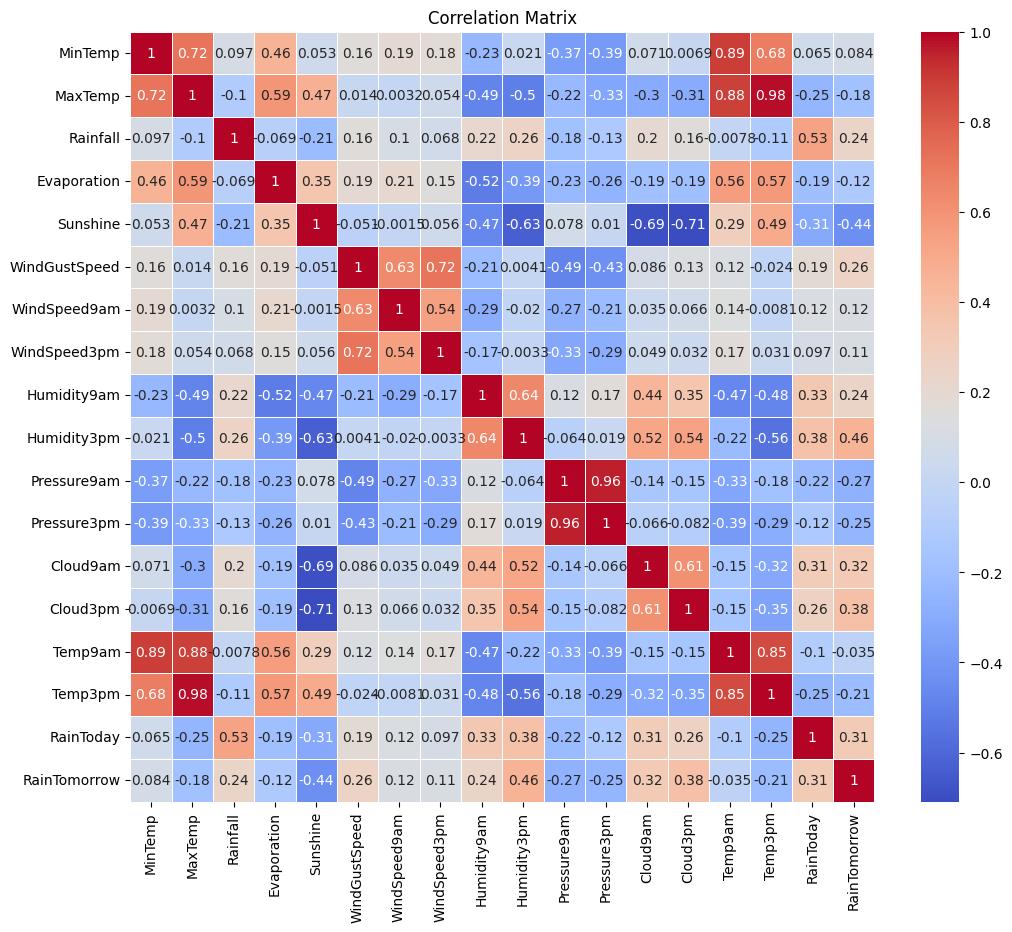

In [ ]:
#2στ. τη συσχέτιση μεταξύ των δεδομένων,

correlation_matrix = train_val.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




Έχω πραγματοποιήσει τα ερωτήματα με διαφορετική σειρά από την εκφώνηση


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def convert_categorical_to_continuous(input_df, date_format):
    # Mapping directions to angles (in radians)
    wind_directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    angles = np.linspace(0, 2 * np.pi, len(wind_directions), endpoint=False)
    direction_to_angle = dict(zip(wind_directions, angles))

    # Apply sine and cosine transformations
    for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        input_df[col + '_sin'] = input_df[col].map(lambda x: np.sin(direction_to_angle[x]) if pd.notnull(x) else np.nan)
        input_df[col + '_cos'] = input_df[col].map(lambda x: np.cos(direction_to_angle[x]) if pd.notnull(x) else np.nan)

    # 'Date' encoding (considering it's cyclic)
    # Assuming 'Date' is in the format 'YYYY-MM-DD'
    input_df['Date'] = pd.to_datetime(input_df['Date'], format=date_format)
    input_df['Month_sin'] = np.sin(2 * np.pi * input_df['Date'].dt.month / 12)
    input_df['Month_cos'] = np.cos(2 * np.pi * input_df['Date'].dt.month / 12)

    # Drop original categorical columns
    input_df.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Date'], axis=1, inplace=True)

    # Encode Location
    le_locations = LabelEncoder()
    input_df['Location'] = le_locations.fit_transform(input_df['Location']).astype(float)

    if 'RainTomorrow' in input_df.columns:
      # Reorder columns moving 'RainTomorrow' to the end
      target_series = input_df.pop('RainTomorrow')  # Remove Target column from DataFrame
      input_df['RainTomorrow'] = target_series  # Place Target column at the end


convert_categorical_to_continuous(train_val,'%Y-%m-%d')

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [ ]:
nan_counts = train_val.isna().sum()
print("Feature        #Unknowns")
print(nan_counts)

Feature        #Unknowns
Location               0
MinTemp              160
MaxTemp              101
Rainfall               0
Evaporation        20384
Sunshine           22997
WindGustSpeed       3093
WindSpeed9am         357
WindSpeed3pm         857
Humidity9am          558
Humidity3pm         1259
Pressure9am         4780
Pressure3pm         4789
Cloud9am           17890
Cloud3pm           18981
Temp9am              226
Temp3pm              913
RainToday              0
WindGustDir_sin     3121
WindGustDir_cos     3121
WindDir9am_sin      3821
WindDir9am_cos      3821
WindDir3pm_sin      1328
WindDir3pm_cos      1328
Month_sin              0
Month_cos              0
RainTomorrow           0
dtype: int64


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(input_df):
    # Enable the IterativeImputer from experimental features
    imp = IterativeImputer(random_state=0)

    # Apply imputation to the dataset
    imputed_data = imp.fit_transform(input_df)

    # Reconstruct the dataframe with the imputed values
    input_df = pd.DataFrame(imputed_data, columns=input_df.columns)

    return input_df


train_val = impute_dataset(train_val)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
nan_counts = train_val.isna().sum()
print("Feature        #Unknowns")
print(nan_counts)

Feature        #Unknowns
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
WindGustDir_sin    0
WindGustDir_cos    0
WindDir9am_sin     0
WindDir9am_cos     0
WindDir3pm_sin     0
WindDir3pm_cos     0
Month_sin          0
Month_cos          0
RainTomorrow       0
dtype: int64


3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε *απαραίτητη*

Θα κάνουμε κλιμάκωση γιατί ταξινoμητές που χρησιμοποιούν την  απόσταση, όπως ο KNN, επηρεάζονται από την κλίμακα των χαρακτηριστικών, ενώ ταξινομητές όπως τα Random Forests δεν επηρεάζονται από την απόσταση

In [ ]:
def scale_dataframe(input_df):
    if 'RainTomorrow' in input_df.columns:
        iter_columns = input_df.columns[:-1] # Exclude the last column ('RainTomorrow')
    else:
      iter_columns = input_df.columns
    for col in iter_columns:
        # Extract column values
        col_values = input_df[col]

        # Find the minimum and maximum values of the column
        min_val = col_values.min()
        max_val = col_values.max()

        # Scale the column values to range [-1, 1]
        scaled_values = ((col_values - min_val) / (max_val - min_val)) * 2 - 1

        # Assign scaled values back to the DataFrame
        input_df[col] = scaled_values

scale_dataframe(train_val)

3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


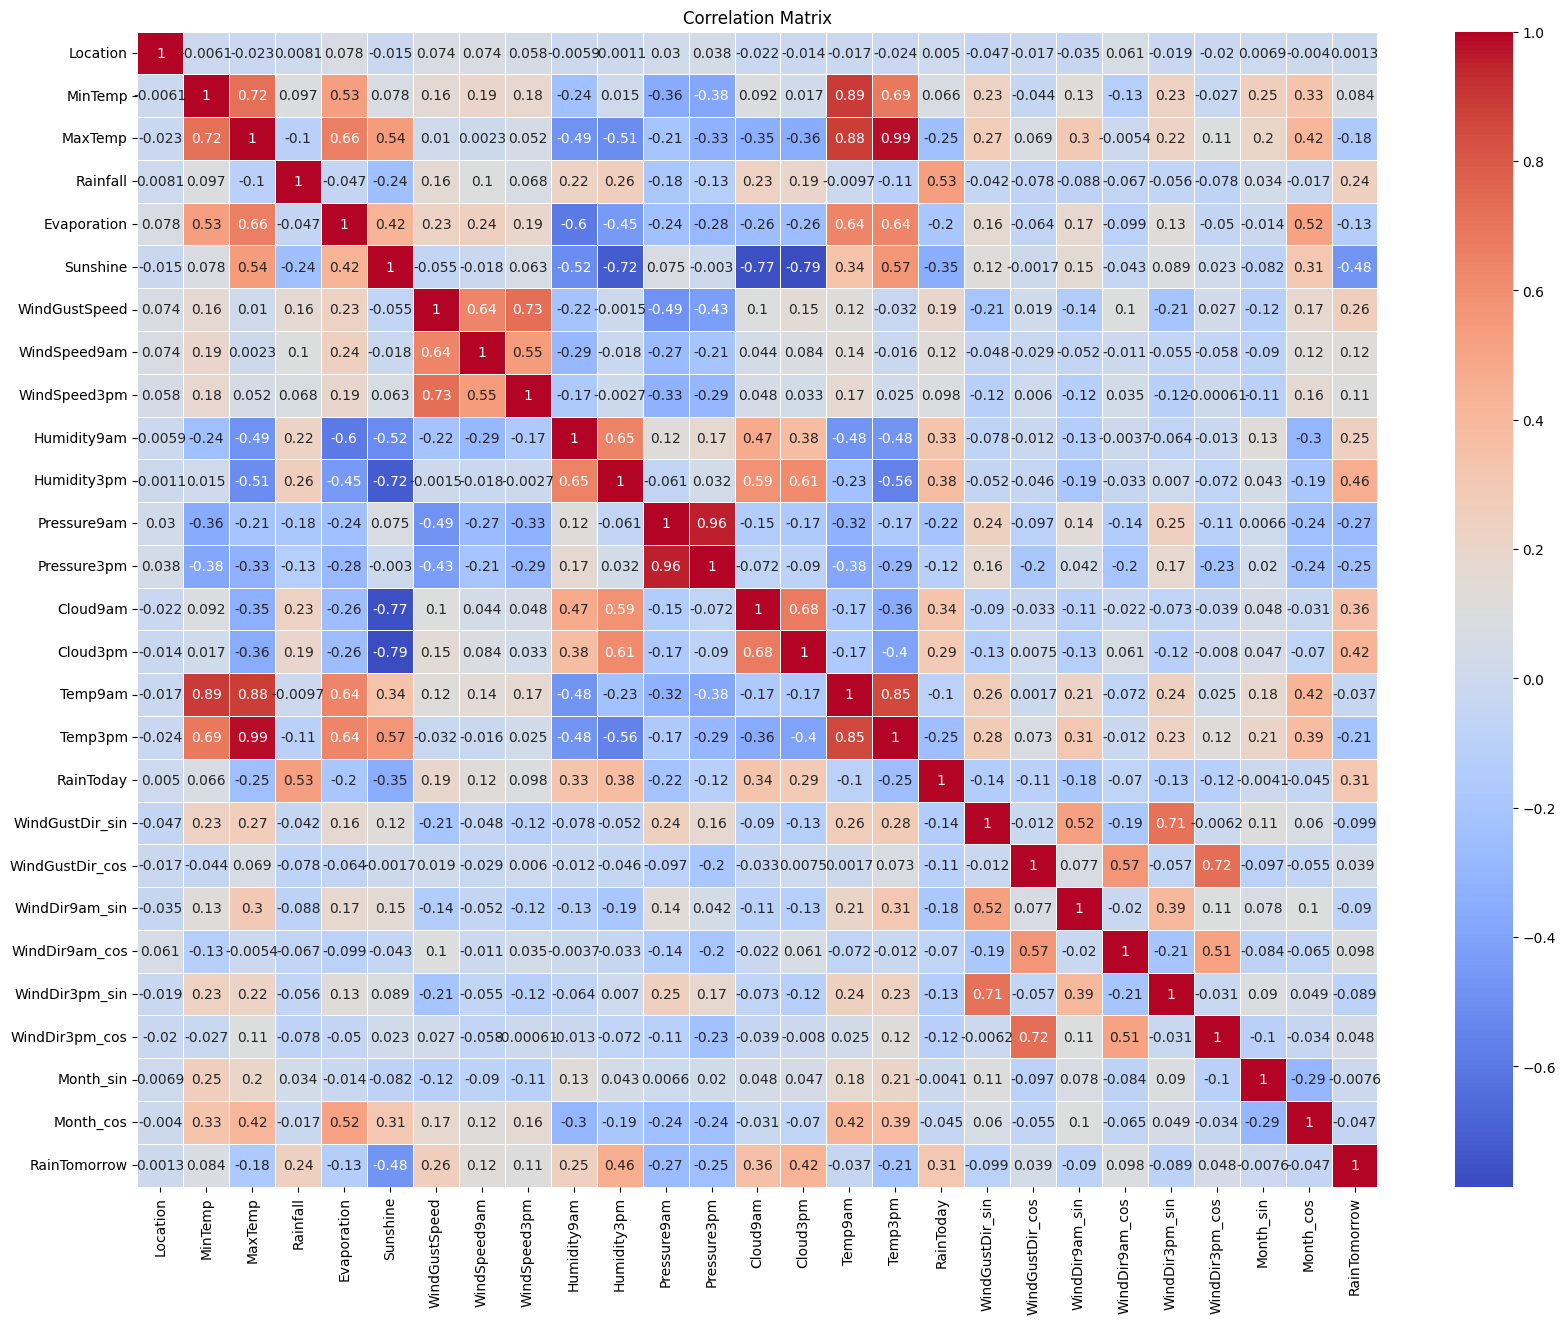

In [ ]:
correlation_matrix = train_val.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

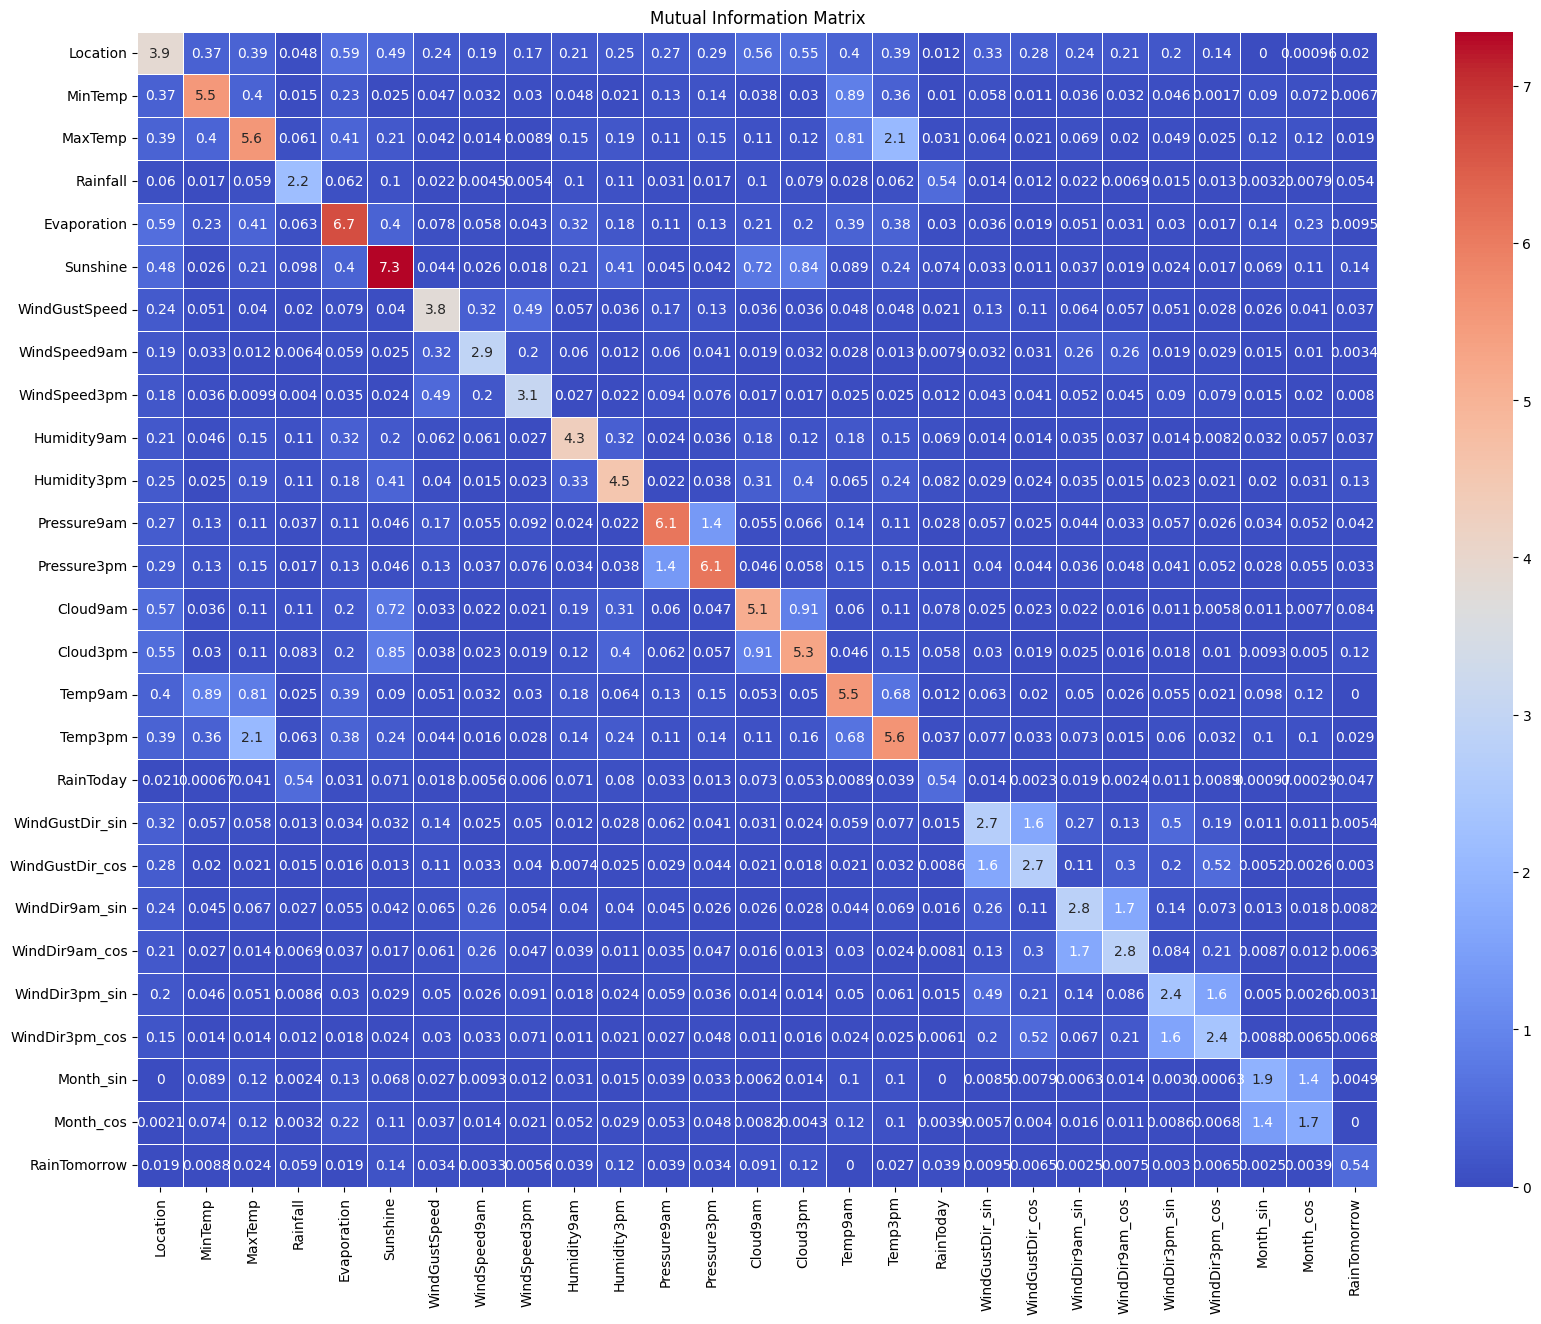

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between each feature and every other feature
mutual_info_matrix = pd.DataFrame(index=train_val.columns, columns=train_val.columns)


for column in train_val.columns:
  mutual_info_matrix[column] = mutual_info_regression(train_val ,train_val[column])


# Visualize the  mutual_info matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(mutual_info_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mutual Information Matrix')
plt.show()

Έχοντας τους παραπάνω δύο πίνακες μπορούμε να μην συμπεριλάβουμε κάποια χαρακτηριστικά που έχουν σχετικά μικρό score στην τελευταία γραμμή(RainTomorrow).

Επίσης μπορούμε να κρατήσουμε ένα feature από τα ζεύγη features των οποίων τα κελία έχουν υψηλό score(correlation-mutual information), π.χ MaxTemp-Temp3pm, Cloud9am-Cloud3pm, Pressure9am-Pressure3pm.

In [ ]:
def drop_columns(input_df):
    columns_to_drop = ['MaxTemp', 'Cloud9am', 'Pressure9am', 'MinTemp', 'Temp9am', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir3pm_cos', 'WindGustDir_cos']

    # Drop the specified columns
    input_df.drop(columns=columns_to_drop, inplace=True)
drop_columns(train_val)

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

Γράφουμε μία συνάρτηση(void) που μετατρέπει το dataframe στην μορφή που θέλουμε με τη βοήθεια των συναρτήσεων void των προηγούμενων ερωτημάτων

In [ ]:
def transform_dataframe(df, date_format):
   convert_categorical_to_continuous(df, date_format)
   df = impute_dataset(df)
   scale_dataframe(df)
   drop_columns(df)
   return df


3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [ ]:
X = train_val.drop(columns=['RainTomorrow'])
y = train_val['RainTomorrow']

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
from sklearn.metrics import f1_score

# Κάνουμε προβλέψεις στο σύνολο επικύρωσης χωρίς τις πραγματικές ετικέτες
naive_bayes_val_pred = naive_bayes.predict(X_val)
knn_val_pred = knn.predict(X_val)
logistic_regression_val_pred = logistic_regression.predict(X_val)
mlp_val_pred = mlp.predict(X_val)
svm_val_pred = svm.predict(X_val)
decision_tree_val_pred = decision_tree.predict(X_val)
random_forest_val_pred = random_forest.predict(X_val)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:
naive_bayes_f1_val = f1_score(y_val, naive_bayes_val_pred)
knn_f1_val = f1_score(y_val, knn_val_pred)
logistic_regression_f1_val = f1_score(y_val, logistic_regression_val_pred)
mlp_f1_val = f1_score(y_val, mlp_val_pred)
svm_f1_val = f1_score(y_val, svm_val_pred)
decision_tree_f1_val = f1_score(y_val, decision_tree_val_pred)
random_forest_f1_val = f1_score(y_val, random_forest_val_pred)

# Εκτύπωση των αποτελεσμάτων
print("Naive Bayes F1 Score on Validation Set:", naive_bayes_f1_val)
print("KNeighborsClassifier F1 Score on Validation Set:", knn_f1_val)
print("Logistic Regression F1 Score on Validation Set:", logistic_regression_f1_val)
print("MLP F1 Score on Validation Set:", mlp_f1_val)
print("SVM F1 Score on Validation Set:", svm_f1_val)
print("Decision Tree F1 Score on Validation Set:", decision_tree_f1_val)
print("Random Forest F1 Score on Validation Set:", random_forest_f1_val)

Naive Bayes F1 Score on Validation Set: 0.6267344415441681
KNeighborsClassifier F1 Score on Validation Set: 0.5980772474278967
Logistic Regression F1 Score on Validation Set: 0.6385377519644688
MLP F1 Score on Validation Set: 0.6746907388833165
SVM F1 Score on Validation Set: 0.6310295176385889
Decision Tree F1 Score on Validation Set: 0.5779011984799767
Random Forest F1 Score on Validation Set: 0.672213555208875


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


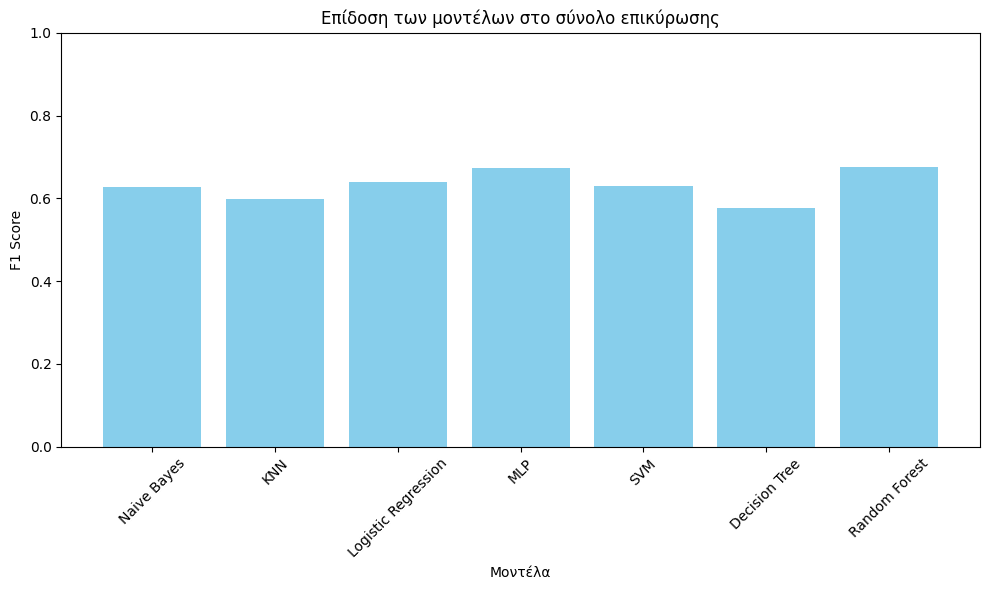

In [ ]:
f1_scores = [
    naive_bayes_f1_val,
    knn_f1_val,
    logistic_regression_f1_val,
    mlp_f1_val,
    svm_f1_val,
    decision_tree_f1_val,
    random_forest_f1_val
]

models = [
    'Naive Bayes',
    'KNN',
    'Logistic Regression',
    'MLP',
    'SVM',
    'Decision Tree',
    'Random Forest'
]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Μοντέλα')
plt.ylabel('F1 Score')
plt.title('Επίδοση των μοντέλων στο σύνολο επικύρωσης')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Σύμφωνα με τα αποτελέσματα την καλύτερη επίδοση παρουυσιάζει το MLP και κοντά είναι το Random Forest**

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/test.csv")
test = transform_dataframe(test,'%d/%m/%Y') # make the test dataframe suitable for the models, transform_dataframe() was implemeted at 3.ε.
mlp_test_val_pred = mlp.predict(test)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [ ]:
predictions_df = pd.DataFrame({'id': range(1,len(test)+1), 'prediction': mlp_test_val_pred})

# Αποθήκευση στο CSV αρχείο
predictions_df.to_csv('predictions_mlp5.csv', index=False)
from google.colab import files  # If using Google Colab

# For local Python environment
files.download('predictions_mlp5.csv')  # This triggers a download prompt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score

# Create a KNeighborsClassifier instance
naive_bayes2 = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    # Variance smoothing values to be tested
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],

    # Prior probabilities for the classes in the classifier
    'priors': [None, [0.3, 0.7], [0.5, 0.5]]
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(naive_bayes2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the validation set
naive_bayes2 = grid_search.best_estimator_
naive_bayes2_val_pred = naive_bayes2.predict(X_val)
naive_bayes2_f1_val = f1_score(y_val, naive_bayes2_val_pred)
print("f1 on validation set:", naive_bayes2_f1_val)


Best parameters: {'priors': None, 'var_smoothing': 1e-05}
Best f1 score: 0.6184422056966756
f1 on validation set: 0.6267344415441681


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score

# Create a KNeighborsClassifier instance
knn2 = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    # Number of neighbors to consider
    'n_neighbors': [3, 5, 10],

    # Weights used in prediction
    'weights': ['uniform', 'distance'],

    # Algorithm used to compute the nearest neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(knn2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the validation set
knn2 = grid_search.best_estimator_
knn2_val_pred = knn2.predict(X_val)
knn2_f1_val = f1_score(y_val, knn2_val_pred)
print("f1 on validation set:", knn2_f1_val)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best f1 score: 0.5869889079576408
f1 on validation set: 0.6034452757960675


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score

# Create a LogisticRegression instance
logistic_regression2 = LogisticRegression(max_iter=1000)  # Setting max_iter to avoid convergence warnings

# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty: L1 or L2
    'C': [0.1, 1.0, 10.0],    # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Optimization solver
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(logistic_regression2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the validation set
logistic_regression2 = grid_search.best_estimator_
logistic_regression2_val_pred = logistic_regression2.predict(X_val)
logistic_regression2_f1_val = f1_score(y_val, logistic_regression2_val_pred)
print("f1 on validation set:", logistic_regression2_f1_val)


Best parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best f1 score: 0.6323526767103334
f1 on validation set: 0.639344262295082


**Για το MLP θα προσπαθήσουμε να βρούμε τις καλύτερες τιμές για 6 από τις παραμέτρους του. Επειδή αν κάναμε grid search και για τις 6 παραμέτρους μονομιάς ο χρόνος εκτέλεσης θα ήταν πολύ μεγάλος, προσπαθούμε να βελτιστοποιήσουμε τις παραμέτρους του ανα δύο και να "φιξάρουμε" αυτές τις τιμές στα επόμενα grid search. Ο προαναφερθείς τρόπος μπορεί να μην μας δίνει τις καλύτερες τιμές για τον συνδυασμό και των έξι παραμέτρων μαζί, όμως είναι ίσως μία "καλή" προσέγγιση αυτών**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score


# Define the MLPClassifier
mlp2 = MLPClassifier(max_iter = 500)

# Define the parameter grid for grid search
param_grid = {
    # Hidden layer sizes configurations
    'hidden_layer_sizes': [(100,), (150,)],

    # Batch sizes for training
    'batch_size': [64, 128, 256],
}
# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)



# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_hidden_layer_sizes = best_params['hidden_layer_sizes']
best_batch_size = best_params['batch_size']

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the test set
mlp2 = grid_search.best_estimator_
mlp2_val_pred = mlp2.predict(X_val)
mlp2_f1_val = f1_score(y_val, mlp2_val_pred)
print("f1 on test set:", mlp2_f1_val)

Best parameters: {'batch_size': 256, 'hidden_layer_sizes': (100,)}
Best f1 score: 0.6648121427983965
f1 on test set: 0.675939248601119


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score


# Define the MLPClassifier
mlp2 = MLPClassifier(max_iter = 500, hidden_layer_sizes= best_hidden_layer_sizes , batch_size = best_batch_size)

# Define the parameter grid for grid search
param_grid = {
    # Regularization parameter values
    'alpha': [0.0001, 0.001],

    # Learning rate variations
    'learning_rate': ['constant', 'adaptive'],
}
# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_alpha = best_params['alpha']
best_learning_rate = best_params['learning_rate']


print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the test set
mlp2 = grid_search.best_estimator_
mlp2_val_pred = mlp2.predict(X_val)
mlp2_f1_val = f1_score(y_val, mlp2_val_pred)
print("f1 on test set:", mlp2_f1_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'alpha': 0.001, 'learning_rate': 'constant'}
Best f1 score: 0.6693297976183914
f1 on test set: 0.6829592684954282


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, f1_score


# Define the MLPClassifier
mlp2 = MLPClassifier(max_iter = 500, hidden_layer_sizes= best_hidden_layer_sizes , batch_size = best_batch_size, alpha = best_alpha, learning_rate = best_learning_rate)

# Define the parameter grid for grid search
param_grid = {
    # Values for the exponential decay rates for the 1st moment estimates
    'beta_1': [0.9, 0.95],

    # Values for the exponential decay rates for the 2nd moment estimates
    'beta_2': [0.999, 0.9999],
}
# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the test set
mlp2 = grid_search.best_estimator_
mlp2_val_pred = mlp2.predict(X_val)
mlp2_f1_val = f1_score(y_val, mlp2_val_pred)
print("f1 on test set:", mlp2_f1_val)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'beta_1': 0.95, 'beta_2': 0.9999}
Best f1 score: 0.6750359682434621
f1 on test set: 0.6757768016918821


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Define the SVC classifier
svc2 = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10], # penalty for misclassification
    'kernel': ['rbf','poly'], # kernel functions to transform the input space
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(svc2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the test set
svc2 = grid_search.best_estimator_
svc2_val_pred = svc2.predict(X_val)
svc2_f1_val = f1_score(y_val, svc2_val_pred)
print("f1 on validation set:", svc2_f1_val)


Best parameters: {'C': 10, 'kernel': 'rbf'}
Best f1 score: 0.6348177991352913
f1 on validation set: 0.653974969152124


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier instance
decision_tree2 = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid_dt = {
    # Criteria for quality of split
    'criterion': ['gini', 'entropy'],

    # Strategy used to choose the split at each node
    'splitter': ['best', 'random'],

    # Maximum depth of the tree
    'max_depth': [None, 5, 10, 15, 20],

    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],

    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 4]
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search_dt = GridSearchCV(decision_tree2, param_grid_dt, cv=5, scoring=f1_scorer)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best parameters for Decision Tree:", best_params_dt)
print("Best f1 score for Decision Tree:", best_score_dt)

# Evaluate the best model on the validation set
decision_tree2 = grid_search_dt.best_estimator_
decision_tree2_val_pred = decision_tree2.predict(X_val)
decision_tree2_f1_val = f1_score(y_val, decision_tree2_val_pred)
print("f1 on validation set for Decision Tree:", decision_tree2_f1_val)


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best f1 score for Decision Tree: 0.611129254089995
f1 on validation set for Decision Tree: 0.6245365689248399


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the Random Forest classifier
random_forest2 = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],  # Different numbers of trees
    'max_depth': [10, 15],  # Maximum depth of the trees
    'min_samples_leaf': [1, 2],  # Test different minimum samples for leaf nodes
    'min_samples_split': [2, 4]  # Minimum samples required to split a node
}

# Create the F1 scorer
f1_scorer = make_scorer(f1_score)

# Perform GridSearchCV
grid_search = GridSearchCV(random_forest2, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("Best parameters:", best_params)
print("Best f1 score:", best_score)

# Evaluate the best model on the test set
random_forest2 = grid_search.best_estimator_
random_forest2_val_pred = random_forest2.predict(X_val)
random_forest2_f1_val = f1_score(y_val, random_forest2_val_pred)
print("f1 score on test set:", random_forest2_f1_val)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best f1 score: 0.6611653102455185
f1 score on test set: 0.6759689922480621


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
from sklearn.metrics import f1_score

# Κάνουμε προβλέψεις στο σύνολο επικύρωσης χωρίς τις πραγματικές ετικέτες
naive_bayes2_val_pred = naive_bayes2.predict(X_val)
knn2_val_pred = knn2.predict(X_val)
logistic_regression2_val_pred = logistic_regression2.predict(X_val)
mlp2_val_pred = mlp2.predict(X_val)
svc2_val_pred = svc2.predict(X_val)
decision_tree2_val_pred = decision_tree2.predict(X_val)
random_forest2_val_pred = random_forest2.predict(X_val)


6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [ ]:
naive_bayes2_f1_val = f1_score(y_val, naive_bayes2_val_pred)
knn2_f1_val = f1_score(y_val, knn2_val_pred)
logistic_regression2_f1_val = f1_score(y_val, logistic_regression2_val_pred)
mlp2_f1_val = f1_score(y_val, mlp2_val_pred)
svc2_f1_val = f1_score(y_val, svc2_val_pred)
decision_tree2_f1_val = f1_score(y_val, decision_tree2_val_pred)
random_forest2_f1_val = f1_score(y_val, random_forest2_val_pred)

# Εκτύπωση των αποτελεσμάτων
print("Naive Bayes F1 Score on Validation Set:", naive_bayes2_f1_val)
print("KNeighborsClassifier F1 Score on Validation Set:", knn2_f1_val)
print("Logistic Regression F1 Score on Validation Set:", logistic_regression2_f1_val)
print("MLP F1 Score on Validation Set:", mlp2_f1_val)
print("SVM F1 Score on Validation Set:", svc2_f1_val)
print("Decision Tree F1 Score on Validation Set:", decision_tree2_f1_val)
print("Random Forest F1 Score on Validation Set:", random_forest2_f1_val)

Naive Bayes F1 Score on Validation Set: 0.6267344415441681
KNeighborsClassifier F1 Score on Validation Set: 0.6034452757960675
Logistic Regression F1 Score on Validation Set: 0.639344262295082
MLP F1 Score on Validation Set: 0.6757768016918821
SVM F1 Score on Validation Set: 0.653974969152124
Decision Tree F1 Score on Validation Set: 0.6245365689248399
Random Forest F1 Score on Validation Set: 0.6759689922480621


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


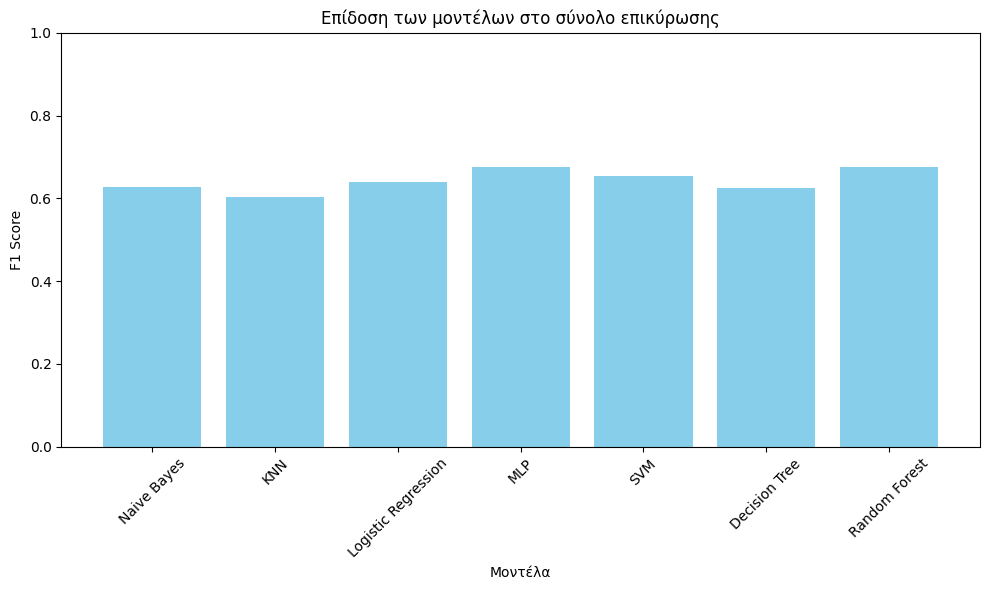

In [ ]:
f1_scores = [
    naive_bayes2_f1_val,
    knn2_f1_val,
    logistic_regression2_f1_val,
    mlp2_f1_val,
    svc2_f1_val,
    decision_tree2_f1_val,
    random_forest2_f1_val
]

models = [
    'Naive Bayes',
    'KNN',
    'Logistic Regression',
    'MLP',
    'SVM',
    'Decision Tree',
    'Random Forest'
]

plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Μοντέλα')
plt.ylabel('F1 Score')
plt.title('Επίδοση των μοντέλων στο σύνολο επικύρωσης')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Και πάλι το MLP και το Random Forest φαίνεται να έχουν την καλύτερη επίδοση

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/test.csv")
test = transform_dataframe(test,'%d/%m/%Y') # make the test dataframe suitable for the models, transform_dataframe() was implemeted at 3.ε.
mlp2_test_val_pred = mlp2.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [ ]:
predictions2_df = pd.DataFrame({'id': range(1,len(test)+1), 'prediction': mlp2_test_val_pred})

# Αποθήκευση στο CSV αρχείο
predictions_df.to_csv('predictions_mlp7.csv', index=False)
from google.colab import files  # If using Google Colab

# For local Python environment
files.download('predictions_mlp7.csv')  # This triggers a download prompt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>